## Envirnment

In [1]:
! pip install yfinance
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.formula.api as smf
import seaborn as sns

# Implementation of Linear Regression


In [2]:
def data_import(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def process_date(data):
    data.index = pd.to_datetime(data.index)
    data['Data_ordinal'] = data.index.map(pd.Timestamp.toordinal) # Convert 'Date' index to numeric format for regression
    return data

def fit_linear_regression(data):
    model = smf.ols("Close ~ Data_ordinal", data=data)
    model = model.fit()
    return model

def predict(model, data):
    data['Predicted_Close'] = model.predict(data)
    return data

def plot_actual_vs_predicted(data, ticker):
    sns.lineplot(data=data, x=data.index, y='Close', label='Actual Close', color='green')
    sns.lineplot(data=data, x=data.index, y='Predicted_Close', label='Predicted Close', color='red')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Actual vs Predicted Close Prices {ticker}')
    plt.legend()
    plt.show()
    


def main_drawing_linear_regression(ticker, start_date, end_date):
    data = data_import(ticker, start_date, end_date)
    data = process_date(data)
    model = fit_linear_regression(data)
    data = predict(model, data)
    plot_actual_vs_predicted(data, ticker)




# Example: SPX500

[*********************100%%**********************]  1 of 1 completed


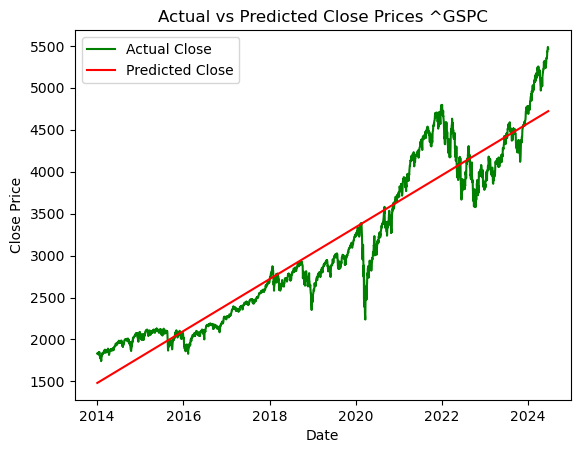

In [12]:
# Example: SPX500
ticker = '^GSPC'
start_date = '2014-01-01'
end_date = '2024-06-24'
main_drawing_linear_regression(ticker, start_date, end_date)